In [ ]:
# prompt: install pandas

!pip install pandas
import pandas as pd

file_path = r'app_reviews_with_time_and_version_clue.csv'
df = pd.read_csv(file_path)
print(df.head())

                               reviewId       userName  \
0  a32b525d-f8d4-4f68-afff-9cdd4d7de8cb  A Google user   
1  99758246-d266-4d43-bd33-9f40a62fb7a7  A Google user   
2  8b99d9bc-f26c-45e0-933b-0c1918f27050  A Google user   
3  a2cf1bea-3067-4c42-bb8e-9a72ce280af7  A Google user   
4  a4b92428-fc5f-4e6d-be94-32c24c06276d  A Google user   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  I can't access analysis to reset my cycle leng...      1              0   
1  this app is great but it's just really annoyin...      3              0   
2                                  It requires money      1              0   
3 

In [ ]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,a32b525d-f8d4-4f68-afff-9cdd4d7de8cb,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I can't access analysis to reset my cycle leng...,1,0,164.0,2024-10-20 23:05:36,"Hey, thanks for getting in touch. We’re sorry ...",2024-10-21 07:08:38,164.0
1,99758246-d266-4d43-bd33-9f40a62fb7a7,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,this app is great but it's just really annoyin...,3,0,176.0,2024-10-20 21:54:46,"Hey, thanks for your review. We introduced Clu...",2024-10-21 07:06:28,176.0
2,8b99d9bc-f26c-45e0-933b-0c1918f27050,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It requires money,1,0,NaN,2024-10-20 18:52:05,"Hey, thanks for your review. We introduced Clu...",2024-10-21 07:06:26,NaN
3,a2cf1bea-3067-4c42-bb8e-9a72ce280af7,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Worst app don't use,1,0,177.1,2024-10-20 14:45:12,"Hey, thanks for your review. We’re sorry to he...",2024-10-21 07:06:57,177.1
4,a4b92428-fc5f-4e6d-be94-32c24c06276d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"It's a good app, but I really don't like that ...",1,0,NaN,2024-10-20 13:39:17,"Hello, we understand you’re disappointed about...",2024-10-21 07:05:14,NaN


In [ ]:
%pip install matplotlib
%pip install seaborn
%pip install numpy
%pip install scipy
%pip install scikit-learn
%pip install seaborn



In [ ]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
# 1. Data Cleaning
# 1.1. Check for missing values
df.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,6
score,0
thumbsUpCount,0
reviewCreatedVersion,8302
at,0
replyContent,54765
repliedAt,54765


In [ ]:
# Drop rows with missing 'content' as they are not helpful for review analysis
df.dropna(subset=['content'], inplace=True)

In [ ]:
# Remove unnecessary columns
df.drop(['userImage'], axis=1, inplace=True)

In [ ]:
# Standardize text data in 'content'
df['content'] = df['content'].str.lower().str.strip()


In [ ]:
# Convert 'at' and 'repliedAt' to datetime
df['at'] = pd.to_datetime(df['at'], errors='coerce')
df['repliedAt'] = pd.to_datetime(df['repliedAt'], errors='coerce')

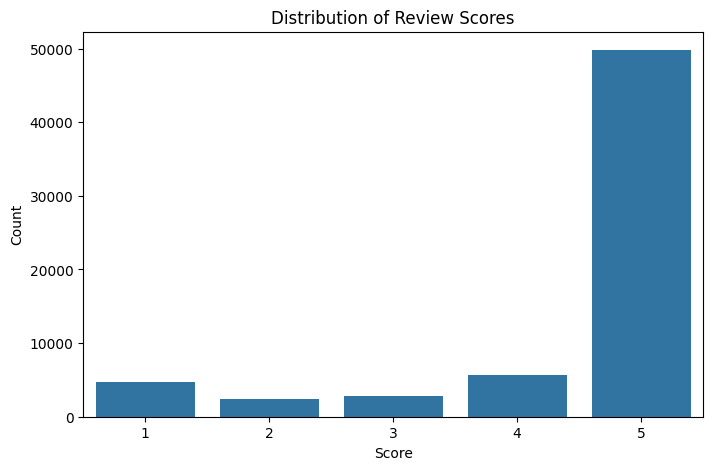

In [ ]:
# Score distribution visualization
plt.figure(figsize=(8, 5))
sns.countplot(x='score', data=df)
plt.title('Distribution of Review Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

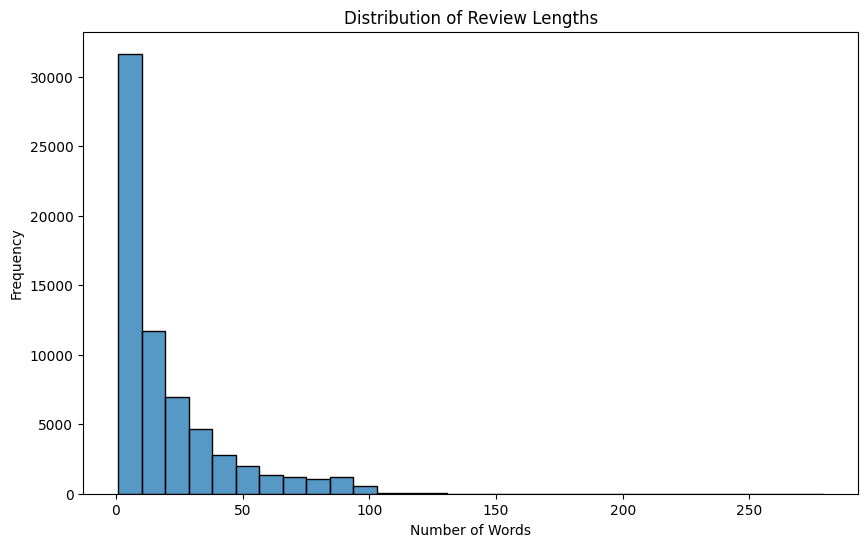

In [ ]:
# Review length analysis
df['review_length'] = df['content'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


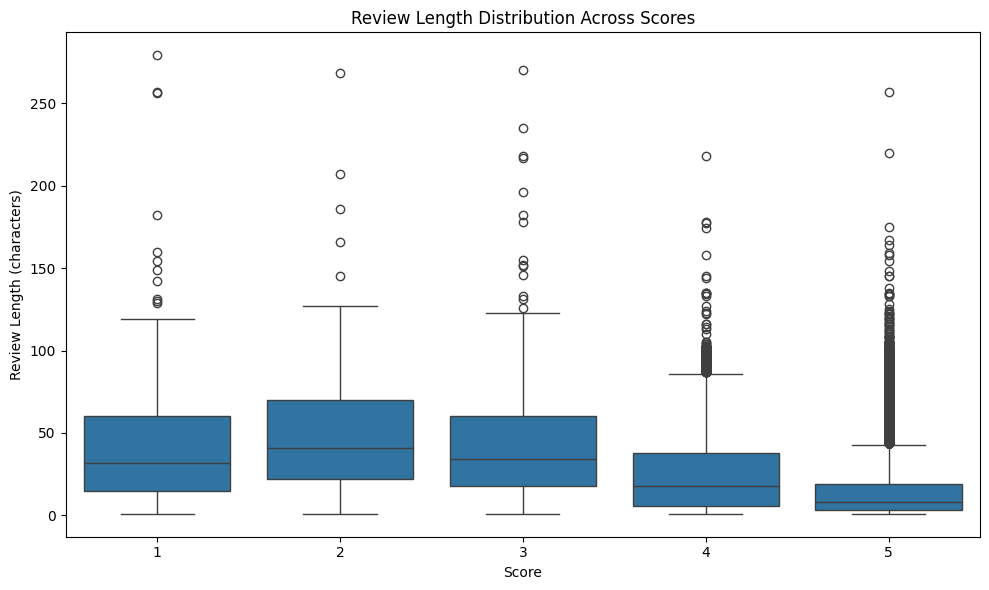

In [ ]:
# 3. Boxplot to Show Review Length Distribution Across Scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='score', y='review_length', data=df)
plt.title('Review Length Distribution Across Scores')
plt.xlabel('Score')
plt.ylabel('Review Length (characters)')
plt.tight_layout()
plt.show()

In [ ]:
#text operations

sent1 = ['I', 'teach', 'in', 'TCD']
sent1.append("Dublin, Ireland")  #  append() modifies the list in place

In [ ]:
name = "Ayushi"
name * 2  #  * operator concatenates strings
name + "Tandon"  #  + operator concatenates strings

'AyushiTandon'

In [ ]:
print(sent1)
print(name * 2)
print(name + "Tandon")


['I', 'teach', 'in', 'TCD', 'Dublin, Ireland']
AyushiAyushi
AyushiTandon


In [ ]:

#NLTK

import nltk
nltk.download('all')

from nltk.book import *

nltk.corpus.gutenberg.fileids()

emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
emma.concordance("surprize")


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a jo

In [ ]:
#working with clue reviews again

nltk.download('punkt_tab')
from nltk.text import Text
text_series = df['content']
# Combine all text into a single string
all_text = ' '.join(text_series)
# Tokenize the combined string
text_tokens = nltk.word_tokenize(all_text)
# Create an NLTK Text object
text = Text(text_tokens)
text.concordance('pain')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Displaying 25 of 587 matches:
 suggestions : 1. different types of pain - i have pelvic pain . it 's not per
ferent types of pain - i have pelvic pain . it 's not period , ovulation or ba
it 's not period , ovulation or back pain . it 's due to endometriosis and ade
other features like how ur feeling , pain , cravings , digestion , and etc . t
how heavy of a flow or what types of pain you will get in a day , or tracking 
eriods with daily entries for mood , pain , energy , and digestive issues like
iod and your most wings , cravings , pain every thing . it is very good at for
ger ! having to pay to record period pain is the last straw for me . that 's t
to track multiple symptoms ( such as pain or pms ) so it becomes better at pre
ata to bring to my provider to track pain and my cycles and i wanted to help b
tion to add your own ( like areas of pain that they have n't got , or other sy
 to pay to track intensity of period pain . i literally only want to track my 
rface that i once love

symptoms tracking it period cycle time mood app data day pms days and
periods that calendar information the everything info


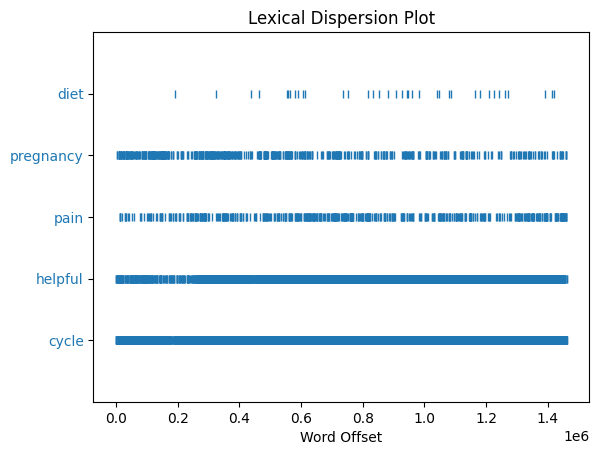

In [ ]:
text.similar('pain')

text.dispersion_plot(["diet", "pregnancy", "pain", "helpful", "cycle"])
